# Análise de dados de preço e variáveis climáticas

O objetivo deste notebook é visualizar e compreender as variáveis que compõem o dataset

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
price_weather_df = pd.read_csv('../../processed_data/price_weather_weekly_df-2016-2023.csv',index_col='dt', parse_dates=True)
price_weather_df.drop(columns=['first_day_week'], inplace=True)
price_weather_df

,Alface Americana - Roça,Alface Crespa - Roça,Alface Lisa - Roça,Alface Americana - Atacado,Alface Crespa - Atacado,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),...,TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
dt,,,,,,,,,,,,,,,,,,,,,
2016-04-24 00:00:00+00:00,0.592500,0.616500,0.618000,NaN,NaN,0.000000,907.386111,907.597222,907.213889,805.462393,...,21.968056,20.484722,16.069444,14.787500,75.597222,67.736111,71.763889,219.597222,1.976389,0.140278
2016-05-01 00:00:00+00:00,1.000000,0.426111,0.500000,NaN,NaN,0.145238,905.865476,906.075000,905.628571,358.881090,...,17.910119,17.040476,14.511310,13.772024,84.839286,81.220238,83.279762,174.041667,3.461905,0.521429
2016-05-08 00:00:00+00:00,1.041667,0.437778,0.479444,NaN,NaN,0.021429,909.642262,909.846429,909.453571,559.004533,...,16.691667,15.564881,14.151786,13.103571,88.702381,83.500000,86.303571,197.541667,1.684524,0.204762
2016-05-15 00:00:00+00:00,1.055833,0.430556,0.430556,NaN,NaN,0.215476,909.359524,909.569643,909.135714,346.476328,...,17.743452,16.867262,15.407143,14.588095,89.601190,84.839286,87.196429,189.976190,2.242262,0.270238
2016-05-22 00:00:00+00:00,0.764167,0.444444,0.398333,NaN,NaN,0.115476,908.848810,909.090476,908.598810,406.224192,...,18.666667,17.812500,15.844643,15.135119,87.083333,82.839286,84.976190,208.922619,3.440476,0.574405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03 00:00:00+00:00,1.875000,0.750000,0.750000,1.0,0.5,0.077381,905.600595,905.836012,905.375595,671.860714,...,21.935119,20.800893,18.759821,17.689583,86.452381,79.440476,83.136905,183.988095,4.221131,1.291071
2023-12-10 00:00:00+00:00,1.458333,0.677083,0.677083,1.0,0.5,0.697619,906.600000,906.830357,906.368452,649.313690,...,21.825000,20.777976,19.458929,18.419643,90.095238,84.946429,87.648810,154.059524,3.461310,0.982738
2023-12-17 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,0.347619,906.604464,906.823512,906.398512,776.282738,...,20.994940,19.836310,17.822917,16.600000,86.422619,79.940476,83.294643,186.979167,3.731845,1.075595


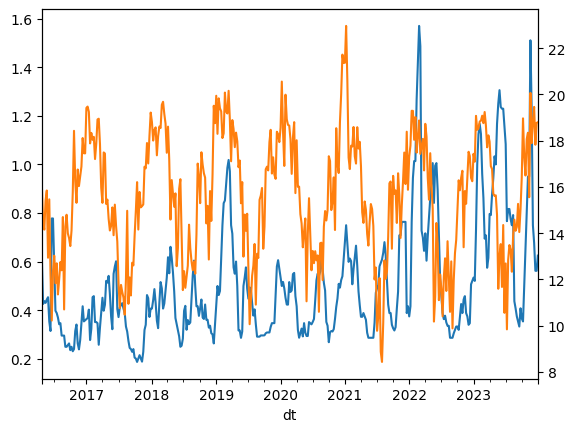

In [25]:
price_weather_df['Alface Crespa - Roça'].plot()
price_weather_df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].plot(secondary_y=True)
plt.show()

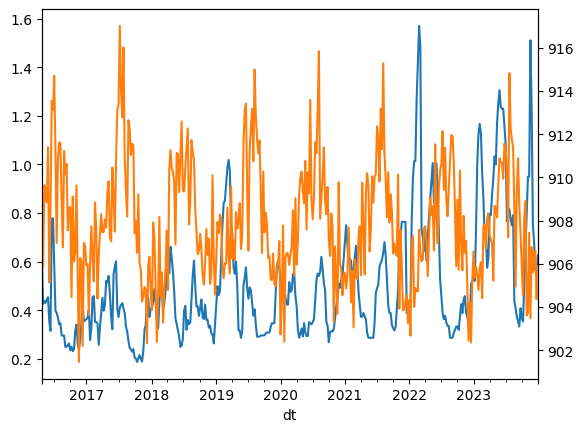

In [26]:
price_weather_df['Alface Crespa - Roça'].plot()
price_weather_df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].plot(secondary_y=True)
plt.show()

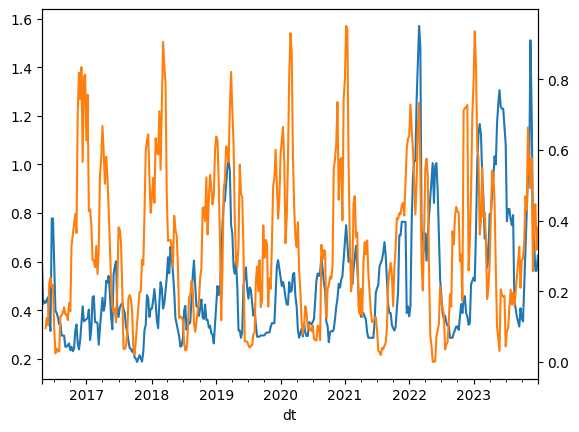

In [39]:
price_weather_df['Alface Crespa - Roça'].plot()
price_weather_df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].rolling(window=4).mean().plot(secondary_y=True)
plt.show()

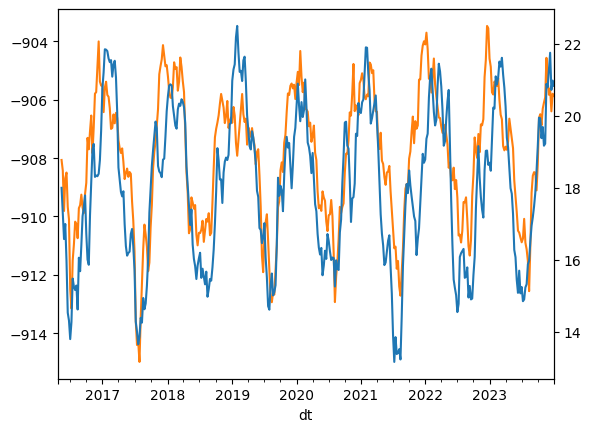

In [35]:
#price_weather_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].plot()
price_weather_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].rolling(window=4).mean().plot(secondary_y=True)
(-price_weather_df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)']).rolling(window=4).mean().plot()

plt.show()

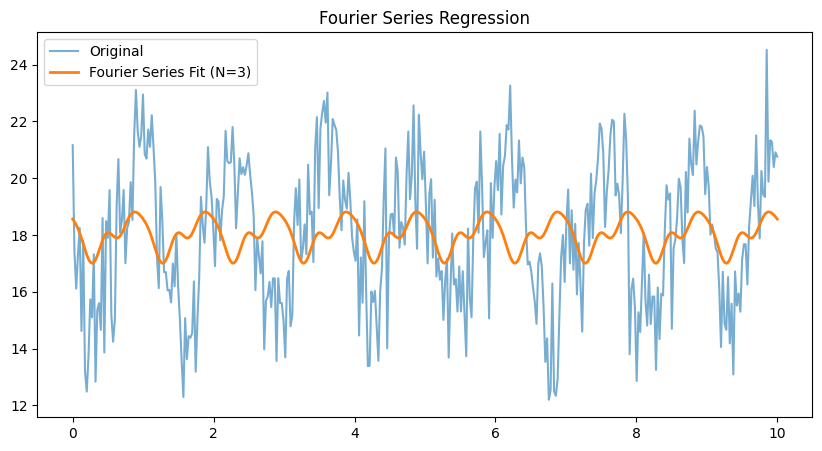

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated cyclical data
np.random.seed(1)
t = np.linspace(0, 10, 402)
true_freq = 1.0  # dominant frequency
y = 3 * np.sin(2 * np.pi * true_freq * t) + 1.5 * np.cos(4 * np.pi * true_freq * t) + np.random.normal(0, 0.5, len(t))

y = price_weather_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']
#t = np.linspace(0, 10, 500)
# Build Fourier features up to order N
def fourier_features(t, freq, N):
    X = [np.ones(len(t))]  # constant term (a_0)
    for n in range(1, N + 1):
        X.append(np.sin(2 * np.pi * n * freq * t))
        X.append(np.cos(2 * np.pi * n * freq * t))
    return np.column_stack(X)

# Parameters
N = 3    # Number of Fourier components
freq = 1.0      # You can estimate this using FFT

# Build design matrix and fit
X = fourier_features(t, freq, N)
model = LinearRegression().fit(X, y)
y_fit = model.predict(X)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Original', alpha=0.6)
plt.plot(t, y_fit, label='Fourier Series Fit (N=3)', linewidth=2)
plt.legend()
plt.title("Fourier Series Regression")
plt.show()

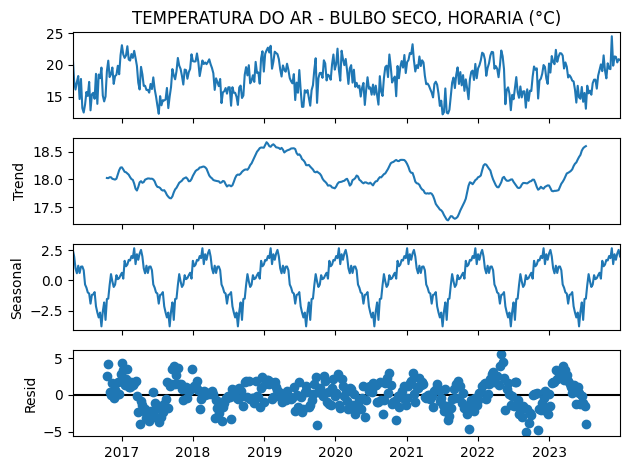

In [24]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'ts' is a pandas Series with a DateTimeIndex
ts = pd.Series(y, index=price_weather_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'])

result = seasonal_decompose(price_weather_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], model='additive', period=50).plot(seasonal=True)
#result.plot()
#plt.show()

In [51]:
df = price_weather_df[['Alface Crespa - Roça', 'TEMPERATURA DO PONTO DE ORVALHO (°C)']].copy()
df['day_index'] = df.index.dayofyear
df

,Alface Crespa - Roça,TEMPERATURA DO PONTO DE ORVALHO (°C),day_index
dt,,,
2016-04-24 00:00:00+00:00,0.616500,15.415278,115
2016-05-01 00:00:00+00:00,0.426111,14.113095,122
2016-05-08 00:00:00+00:00,0.437778,13.625000,129
2016-05-15 00:00:00+00:00,0.430556,14.971429,136
2016-05-22 00:00:00+00:00,0.444444,15.469048,143
...,...,...,...
2023-12-03 00:00:00+00:00,0.750000,18.205357,337
2023-12-10 00:00:00+00:00,0.677083,18.892857,344
2023-12-17 00:00:00+00:00,0.562500,17.161905,351
